Import all the libraries.<br/>
Use pandas and numpy to load and deal with the data.<br/>
Use wordcloud to create a plot for the text content.<br/>
Use matplotlib and seaborn to create plot for results.<br/>
Use scikit-learn to encode the label, split the data set, build machine learnong models and get the accuracy.<br/>
Use keras to tokenize the text and build CNN and RNN.<br/>
Use tensorflow 2.0 and tensorflow-gpu backend.

In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Load the data set. Since the data set contains text, so I set the encoding to "latin-1".

In [2]:
resume=pd.read_csv("Sheet_2.csv",encoding='latin-1')

Show the first five rows of the data set.

In [3]:
resume.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


Get the numbers of the label.

In [4]:
resume['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

Creat a histogram for the label.

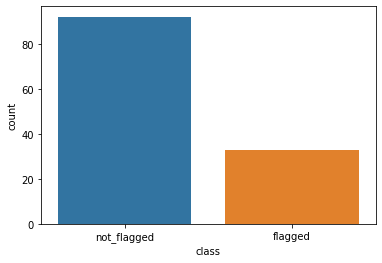

In [5]:
sns.countplot(resume['class'],label="Count")
plt.show()

Create word cloud for the text content. This plot can show words that appear frequently in the text.

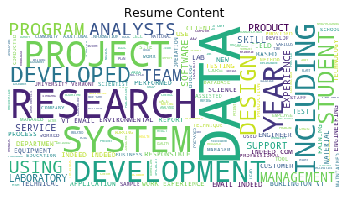

In [6]:
#set the variable
sw=set(stopwords.words('english'))
text=resume['resume_text']

#create word cloud
wordcloud=WordCloud(background_color="white",stopwords=sw).generate("".join([i for i in text.str.upper()]))

#show the plot
plt.title("Resume Content")
plt.axis("off")
plt.imshow(wordcloud)

Encode the label.

In [7]:
encode=preprocessing.LabelEncoder()
resume['label']=encode.fit_transform(resume['class'])
resume['label'].value_counts()

1    92
0    33
Name: label, dtype: int64

Show the data set after encoding.

In [8]:
resume.head()

,resume_id,class,resume_text,label
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...,1
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...,1
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...,1
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...,1
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...,0


Split training set and testing set. Then use tokenizer in Keras to convert text to vectors. This step is designed to convert the text to a new type that can be recognized by models.

In [9]:
#set the variables
x=resume.resume_text
y=resume.label.values

#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

#create a Tokenizer object
#ignore the text of 5000 words or more
tokenizer=Tokenizer(num_words=5000)

#fit the training set
#number each word in the training set
#the more frequently a word appears, the smaller its number
tokenizer.fit_on_texts(x_train)

#convert each word in the training and testing set to a list of numbers
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

#get the length of the Tokenizer object
# add 1 because the index starts from 0
vocab_size=len(tokenizer.word_index)+1                          

#length of each sample is not necessarily equal
#set a max value for the length of each sample
maxlen=500

#sample that exceeds "maxlen" will be cut off
#fill the sample which is shorter than "maxlen" with 0
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

#reshape label
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

Show the type of the data

In [10]:
print('X_train type:',type(X_train))
print('y_train type:',type(y_train))
print('X_test type:',type(X_test))
print('y_test type:',type(y_test))

X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
X_test type: <class 'numpy.ndarray'>
y_test type: <class 'numpy.ndarray'>


Show the shape of the data

In [11]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (100, 500)
y_train shape: (100, 1)
X_test shape: (25, 500)
y_test shape: (25, 1)


Define a function to build models based on Gaussian Naive Bayes, Logistic Regression, K-nearest Neighbors,Support Vector Machine, Linear Discriminant Analysis, Decision Tree and Random Forest.

In [12]:
def ML_Algorithm(X_train,X_test,y_train,y_test):
    
    #Gaussian Naive Bayes
    NB=GaussianNB()
    NB.fit(X_train,y_train)
    NBpred=NB.predict(X_test)
    NBAcc=metrics.accuracy_score(y_test,NBpred)
    
    #Logistic Regression
    LR=LogisticRegression()
    LR.fit(X_train, y_train)
    LRpred=LR.predict(X_test)
    LRAcc=metrics.accuracy_score(y_test,LRpred)
    
    #K-nearest Neighbors
    KNN=KNeighborsClassifier()
    KNN.fit(X_train, y_train)
    KNNpred=KNN.predict(X_test)
    KNNAcc=metrics.accuracy_score(y_test,KNNpred)
    
    #Support Vector Machine
    SVM=SVC()
    SVM.fit(X_train, y_train)
    SVMpred=SVM.predict(X_test)
    SVMAcc=metrics.accuracy_score(y_test,SVMpred)
    
    #Linear Discriminant Analysis
    LDA=LinearDiscriminantAnalysis()
    LDA.fit(X_train, y_train)
    LDApred=LDA.predict(X_test)
    LDAAcc=metrics.accuracy_score(y_test,LDApred)
    
    #Decision Tree
    #Set max depth to avoid overfitting
    DT=DecisionTreeClassifier(max_depth=10)
    DT.fit(X_train,y_train)
    DTpred=DT.predict(X_test)
    DTAcc=metrics.accuracy_score(y_test,DTpred)
    
    #Random Forest
    #Set max depth and max features to avoid overfitting
    RF=RandomForestClassifier(max_depth=10,max_features=5)
    RF.fit(X_train,y_train)
    RFpred=RF.predict(X_test)
    RFAcc=metrics.accuracy_score(y_test,RFpred)
    
    #print the accuracy of each model
    print('Accuracy of Gaussian Naive Bayes is: {:.2f}'.format(NBAcc))
    print('Accuracy of Logistic Regression is: {:.2f}'.format(LRAcc))
    print('Accuracy of K-nearest Neighbors is: {:.2f}'.format(KNNAcc))
    print('Accuracy of Support Vector Machine is: {:.2f}'.format(SVMAcc))
    print('Accuracy of Linear Discriminant Analysis is: {:.2f}'.format(LDAAcc))
    print('Accuracy of Decision Tree is: {:.2f}'.format(DTAcc))
    print('Accuracy of Random Forest is: {:.2f}'.format(RFAcc))

Deploy the function.

In [13]:
ML_Algorithm(X_train,X_test,y_train,y_test)

Accuracy of Gaussian Naive Bayes is: 0.80
Accuracy of Logistic Regression is: 0.76
Accuracy of K-nearest Neighbors is: 0.80
Accuracy of Support Vector Machine is: 0.80
Accuracy of Linear Discriminant Analysis is: 0.64
Accuracy of Decision Tree is: 0.76
Accuracy of Random Forest is: 0.64


D:\miniconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\miniconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\miniconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\miniconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\miniconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: 

Download this zipfile: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip. Then extract it into your default path of jupyter notebook.<br/>
Use "glove" to generate a initial weight matrix for neural network model.

In [14]:
#set embedding dimension
embedding_dim=100

#initialize the embedding matrix
embedding_matrix=np.zeros((vocab_size,embedding_dim))

#create the embedding matrix
with open('glove.6B.50d.txt','rb') as f:
        for line in f:
            word,*vector=line.split()
            if word in tokenizer.word_index:
                idx=tokenizer.word_index[word] 
                embedding_matrix[idx]=np.array(vector,dtype=np.float32)[:embedding_dim]

Build the CNN model.<br/>
Use activitaion function "relu" in convolution layer.<br/>
Set a 10% drop out.<br/>
Use maxpooling.<br/>
In fully connected layer, use activitaion function "sigmoid".<br/>
Use binary crossentropy loss function, adam optimizer and accuracy to compile the model.

In [15]:
model=Sequential()

model.add(layers.Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],input_length=maxlen))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(96,5,activation='relu'))
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(10))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the model with batch size=10,epochs=10.<br/>
Use 80% of the data to train and 20% of them to valid.

In [16]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=10)

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 2s 31ms/sample - loss: 0.6900 - accuracy: 0.6625 - val_loss: 0.6868 - val_accuracy: 0.7500
Epoch 2/10
80/80 [==============================] - 0s 3ms/sample - loss: 0.6853 - accuracy: 0.7125 - val_loss: 0.6799 - val_accuracy: 0.7500
Epoch 3/10
80/80 [==============================] - 0s 2ms/sample - loss: 0.6792 - accuracy: 0.7125 - val_loss: 0.6735 - val_accuracy: 0.7500
Epoch 4/10
80/80 [==============================] - 0s 2ms/sample - loss: 0.6742 - accuracy: 0.7125 - val_loss: 0.6670 - val_accuracy: 0.7500
Epoch 5/10
80/80 [==============================] - 0s 2ms/sample - loss: 0.6683 - accuracy: 0.7125 - val_loss: 0.6603 - val_accuracy: 0.7500
Epoch 6/10
80/80 [==============================] - 0s 2ms/sample - loss: 0.6659 - accuracy: 0.7125 - val_loss: 0.6539 - val_accuracy: 0.7500
Epoch 7/10
80/80 [==============================] - 0s 2ms/sample - loss: 0.6576 - accuracy: 0.7125 - v

Show the accuracy on testing set.

In [17]:
acc=model.evaluate(X_test,y_test)[1]

25/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 10ms/sample - loss: 0.6163 - accuracy: 0.8000


Build the RNN model (LSTM).<br/>
Set a 10% drop out.<br/>
In fully connected layer, use activitaion function "sigmoid".<br/>
Use binary crossentropy loss function, adam optimizer and accuracy to compile the model.

In [18]:
model2=Sequential()

model2.add(layers.Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],input_length=maxlen))
model2.add(layers.LSTM(96,recurrent_dropout=0.1))
model2.add(layers.Dropout(0.1))

model2.add(layers.Dense(10))
model2.add(layers.Dropout(0.1))

model2.add(layers.Dense(1))

model2.add(layers.Activation('sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the model with batch size=10,epochs=10.<br/>
Use 80% of the data to train and 20% of them to valid.

In [19]:
history2=model2.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=10)

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 8s 94ms/sample - loss: 0.6777 - accuracy: 0.6625 - val_loss: 0.6506 - val_accuracy: 0.7500
Epoch 2/10
80/80 [==============================] - 7s 83ms/sample - loss: 0.5977 - accuracy: 0.7125 - val_loss: 0.6279 - val_accuracy: 0.7500
Epoch 3/10
80/80 [==============================] - 7s 86ms/sample - loss: 0.6354 - accuracy: 0.7125 - val_loss: 0.6139 - val_accuracy: 0.7500
Epoch 4/10
80/80 [==============================] - 7s 86ms/sample - loss: 0.5553 - accuracy: 0.7125 - val_loss: 0.6063 - val_accuracy: 0.7500
Epoch 5/10
80/80 [==============================] - 6s 75ms/sample - loss: 0.5009 - accuracy: 0.7375 - val_loss: 0.5882 - val_accuracy: 0.7500
Epoch 6/10
80/80 [==============================] - 6s 73ms/sample - loss: 0.3925 - accuracy: 0.8125 - val_loss: 0.6231 - val_accuracy: 0.7500
Epoch 7/10
80/80 [==============================] - 6s 73ms/sample - loss: 0.3353 - accuracy: 0.86

Show the accuracy on testing set.

In [20]:
acc2=model2.evaluate(X_test,y_test)[1]

25/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 1s 21ms/sample - loss: 0.5074 - accuracy: 0.8000


Graphs to visualize the training and validation data accuracy of CNN.

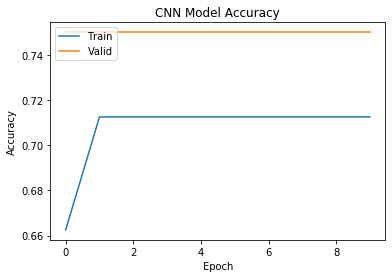

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'],loc='upper left')
plt.show()

Graphs to visualize the training and validation data accuracy of RNN.

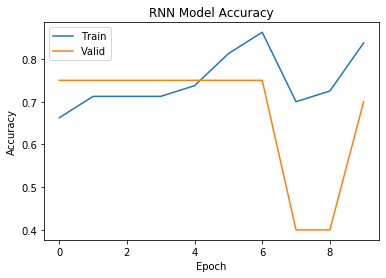

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'],loc='upper left')
plt.show()

Graphs to visualize the accuracy of both CNN and RNN on training set.

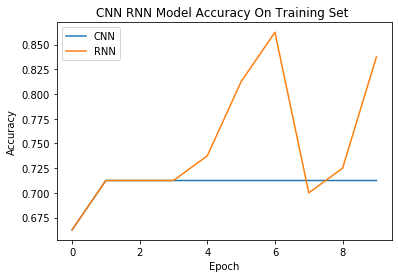

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('CNN RNN Model Accuracy On Training Set ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN', 'RNN'],loc='upper left')
plt.show()

Graphs to visualize the accuracy of both CNN and RNN on validation set.

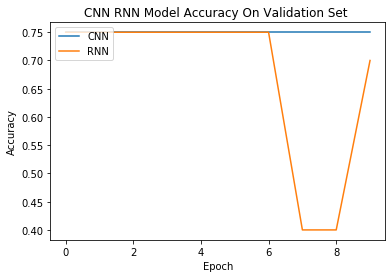

In [24]:
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN RNN Model Accuracy On Validation Set ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN', 'RNN'],loc='upper left')
plt.show()